In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


import pandas as pd
import matplotlib.pyplot as plt
import importlib

#%cd .. # Change to the parent directory

print(os.getcwd())


[Errno 2] No such file or directory: '.. # Change to the parent directory'
/Users/stefan/VSCode/Freight-Prediction
/Users/stefan/VSCode/Freight-Prediction


# Freight Forecasting Project Overview
## Problem Statement

Freight markets are notoriously volatile and influenced by a mix of macroeconomic, operational, and seasonal factors. This project builds a full freight forecasting pipeline based on open-source economic and maritime datasets. Predicting weekly freight prices can aid in:

- Chartering and logistics planning
- Risk analysis for shipping portfolios
- Strategic commodity trading

We incorporate relevant features such as:
- Global commodity and shipping prices (e.g., Brent crude, BPI)
- Port-level congestion indicators
- Agricultural trade flows (e.g., PNW, Corn price)
- Derived indicators like seasonal components and volatility

This notebook demonstrates a comprehensive freight forecasting pipeline that collects multiple datasets in to a single shared dataset, which upon which I train a selection of models. The models evaluated include traditional statistical approaches (e.g., ARIMA/ARIMAX), regression models (Ridge, Lasso), Machine Learning (SVR, XGBoost), and time-series forecasters (Prophet). 

Each model is evaluated on:
- 1-week-ahead prediction accuracy
- MAE (Mean Absolute Error)
- R² Score
- Visual comparison to actual values

We will therefore proceed as follows: Explore the data, engineer features, train and evaluate models, compare their performance, and interpret the best models using SHAP.

## Table of Contents
1. [Problem Statement](#1-problem-statement)  
2. [Data Overview](#2-data-overview)  
   1. [How data is merged, interpolated, resampled](#21-how-data-is-merged-interpolated-resampled)  
3. [Feature Engineering](#3-feature-engineering)  
4. [Model Training and Evaluation](#4-model-training-and-evaluation)  
5. [Model Comparison](#5-model-comparison)  
6. [Model Interpretability](#6-model-interpretability)  
7. [Conclusion and Next Steps](#7-conclusion-and-next-steps)  

## 2. Data Overview

After having reviewed several papers (some of which live in the `theory/` folder), it appeared reasonable to assume that the key inputs driving freight rates include fuel prices, the value of the cargo, supply and demand dynamics, and market frictions such as port congestion. However, since I do not have access to high-quality proprietary data (e.g. Clarkson, Thomson Reuters, or AIS), I needed to explore alternative open-source datasets that could serve a similar purpose. Below is an overview of the public data sources I identified and ingested for this project:


| Variable              | Description                                   | Frequency  | Source 
|-----------------------|-----------------------------------------------|------------|-------------
| `Gulf`                | Gulf freight price (target variable)          | Weekly     | [US Dpm of Agricultural](https://www.ams.usda.gov/services/transportation-analysis/gtr-datasets)
| `PNW`                 | Pacific Northwest freight price               | Weekly     | [US Dpm of Agricultural](https://www.ams.usda.gov/services/transportation-analysis/gtr-datasets)
| `bpi`                 | Baltic Panamax Index                          | Daily      | [See Capital Markets](https://seecapitalmarkets.com/IndexDetailed?Id=430572) 
| `brent_price`         | Brent crude oil price                         | Daily      | [US Energy Information](https://www.eia.gov/dnav/pet/hist/RBRTED.htm)
| `corn_price`          | U.S. corn price                               | Daily      | [See Capital Markets](https://seecapitalmarkets.com/Commodity?Id=72063)
| `wheat_price`         | U.S. wheat price                              | Daily      | [See Capital Markets](https://seecapitalmarkets.com/Commodity?Id=72061)
| `gscpi`               | Global Supply Chain Pressure Index            | Monthly    | [New York Federal Reserve](https://www.newyorkfed.org/research/policy/gscpi#/interactive)
| `trade_vol`           | Trade volume index                            | Monthly    | [CPB World Trade Monitor (EU Com)](https://www.cpb.nl/en/world-trade-monitor-december-2024) 
| `ships_anchored`      | Number of ships anchored (weekly avg)         | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)
| `ships_waiting`       | Number of ships waiting (weekly avg)          | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)
| `ship_cap`            | Container ship capacity                       | Weekly     | [U.S. Department of Transportation](https://www.bts.gov/freight-indicators#inside)

### 2.1 How data is merged, interpolated, resampled

Because the inputs arrive at mixed cadences (daily, weekly, and monthly) I first standardized everything to a Monday-weekly frequency. For monthly series, I forward-filled each month’s value across all weeks; for daily series, I aggregated by weekly mean. Even after alignment, the target series still had gaps, so I used linear interpolation to impute missing weeks. Finally, the limited coverage of the port-congestion proxies forced me to drop any weeks without full exogenous data, leaving a total of 175 complete observations.


In [ ]:
# in your Jupyter notebook
import ipywidgets as widgets
from IPython.display import display
from utils.diagnostics import visualize_missing_data

# create two output “canvases”
out1 = widgets.Output()
out2 = widgets.Output()

# run your existing function inside each one
with out1:
    visualize_missing_data('data/processed/processed.csv')

with out2:
    visualize_missing_data('data/processed/all_data.csv')

# lay them out side by side
h = widgets.HBox([out1, out2])
display(h)


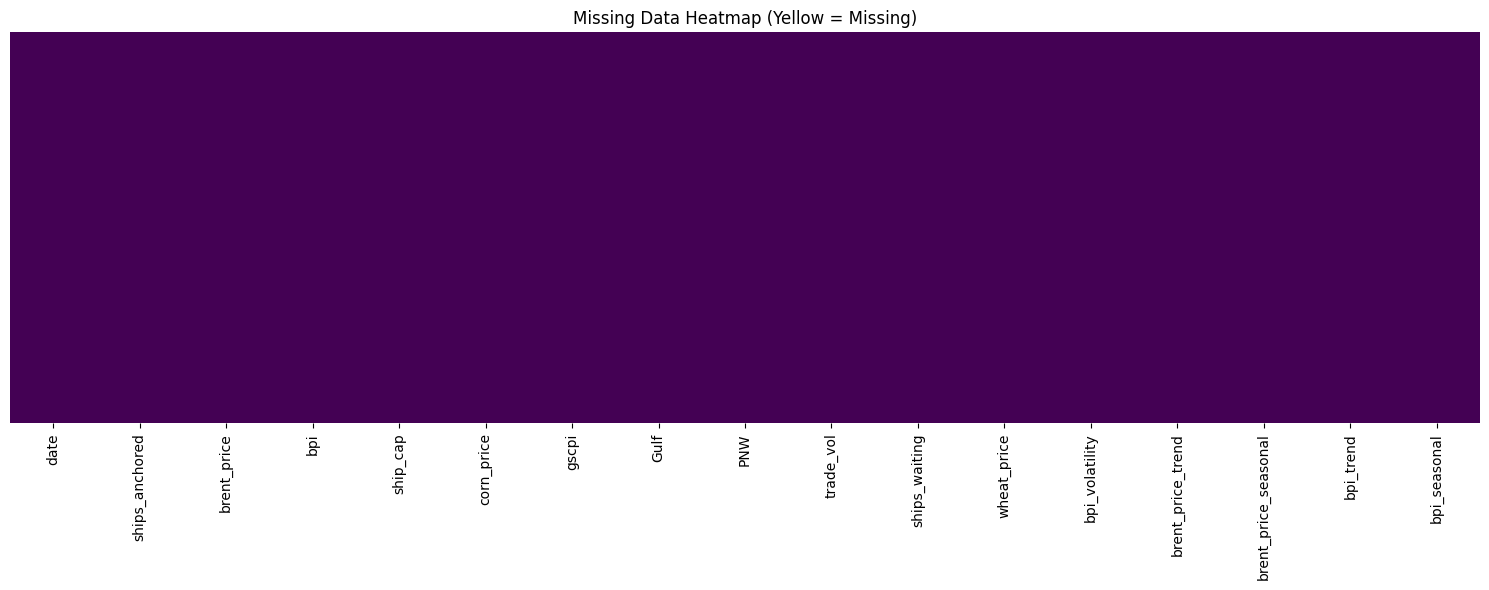

In [14]:
from utils.diagnostics import visualize_missing_data

visualize_missing_data()

In [ ]:
## 2. Feature Engineering

# Create lag features example
max_lag = 5
for lag in range(1, max_lag + 1):
    df[f'Gulf_lag_{lag}'] = df['Gulf'].shift(lag)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Gulf_lag_1'], label='Gulf Lag 1')
plt.title('Lagged Gulf Freight Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
## 3. Model Training and Evaluation
from models.run_all_models import run_all_models
importlib.reload(models.run_all_models)
from models.run_all_models import run_all_models


# Run models pipeline
run_all_models()



In [ ]:
import importlib
import models.run_all_models  # this imports the module properly
importlib.reload(models.run_all_models)  # now you can reload it

from models.run_all_models import run_all_models

run_all_models()



In [ ]:
from models.run_all_models import run_all_models

# Run models pipeline
run_all_models()
